# Train a Perceptron

In [1]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score
import numpy as np
from utils.utils import plot_decision_boundary

## Load data

In [2]:
iris_df = load_iris()
X, y = iris_df.data[:, [2, 3]], iris_df.target
print('Class labels:', np.unique(y))

Class labels: [0 1 2]


## Train & Test split

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)
# This shuffle data
print('Labels counts in y:', np.bincount(y))
print('Labels counts in y_train:', np.bincount(y_train))
print('Labels counts in y_test:', np.bincount(y_test))

Labels counts in y: [50 50 50]
Labels counts in y_train: [35 35 35]
Labels counts in y_test: [15 15 15]


## Standarize

In [4]:
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

## Train & predict model

In [5]:
ppn = Perceptron(eta0=0.1, random_state=1)
ppn.fit(X_train_std, y_train)
y_pred = ppn.predict(X_test_std)

## Evaluate model

In [6]:
print('Misclassified examples: %d out of 45' % (y_test != y_pred).sum())
print('Accuracy: %.3f' % accuracy_score(y_test, y_pred))
print('Accuracy: %.3f' % ppn.score(X_test_std, y_test)) # predict and then accuracy metric

Misclassified examples: 1 out of 45
Accuracy: 0.978
Accuracy: 0.978


## Graph decision regions

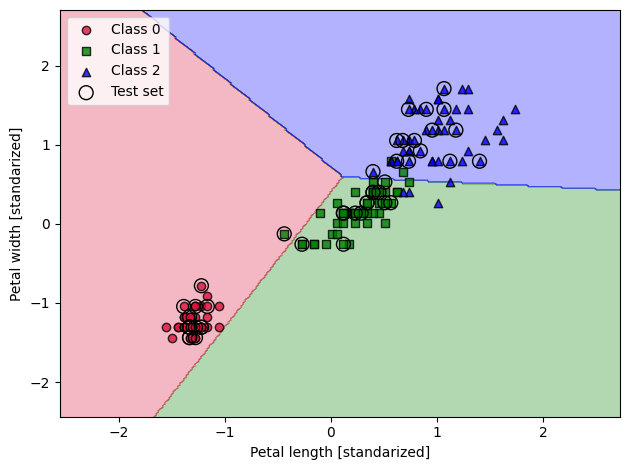

In [7]:
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))
plot_decision_boundary(
    X=X_combined_std,
    y=y_combined,
    classifier=ppn,
    test_idx=range(105,150),
    x_label='Petal length [standarized]',
    y_label='Petal width [standarized]',
)